In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Install the Kaggle library
!pip install kaggle


# Move the uploaded file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vangap/india-power-generation

 94% 65.0M/69.0M [00:00<00:00, 123MB/s]
100% 69.0M/69.0M [00:00<00:00, 123MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/india-power-generation.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Load region dataset
import pandas as pd

# Load power station dataset
df = pd.read_csv('station_type.csv')

# Display the first 5 rows of the power station DataFrame
print("Power Station DataFrame:")
print(df.head(5))
print()

Power Station DataFrame:
     Region    State          Sector Station Type        Date  \
0  NORTHERN    DELHI    STATE SECTOR    THER (GT)  2020-11-17   
1  NORTHERN    DELHI      PVT SECTOR    THER (GT)  2020-11-17   
2  NORTHERN  HARYANA    STATE SECTOR      THERMAL  2020-11-17   
3  NORTHERN  HARYANA      PVT SECTOR      THERMAL  2020-11-17   
4  NORTHERN  HARYANA  CENTRAL SECTOR      THERMAL  2020-11-17   

   Monitored CAP in MW  Generation / Today's Program  \
0               2100.4                         16.44   
1                108.0                          0.00   
2               2510.0                         27.23   
3               1320.0                         18.63   
4               1500.0                         16.38   

   Generation / Today's Actual  Generation / FY YTD Program  \
0                        16.67                      3737.56   
1                         0.00                         0.00   
2                         0.00                      7014.9

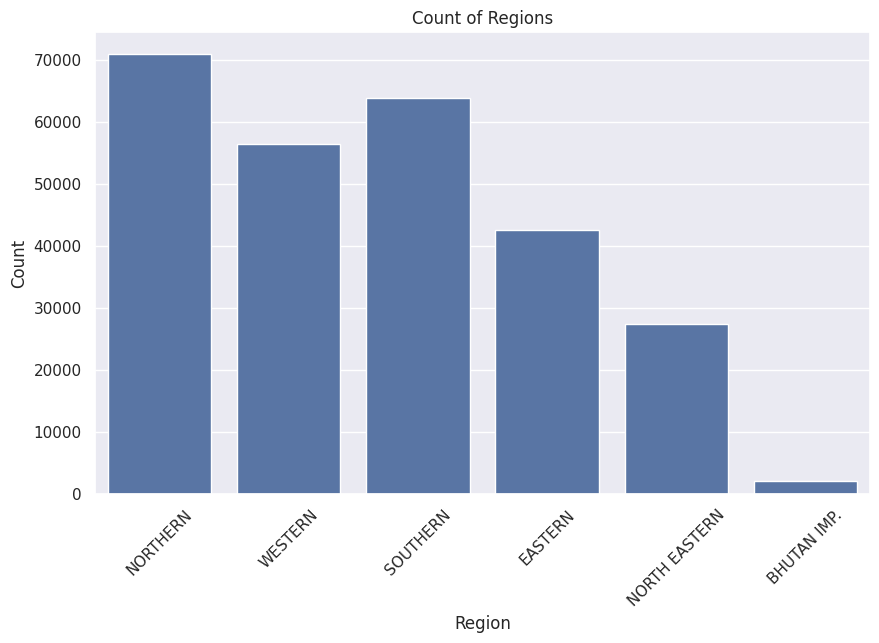

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Region DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
generation_col = "Generation / Today's Program"
region = pd.read_csv("/content/station.csv")
results = region.groupby("Region")[generation_col].sum()

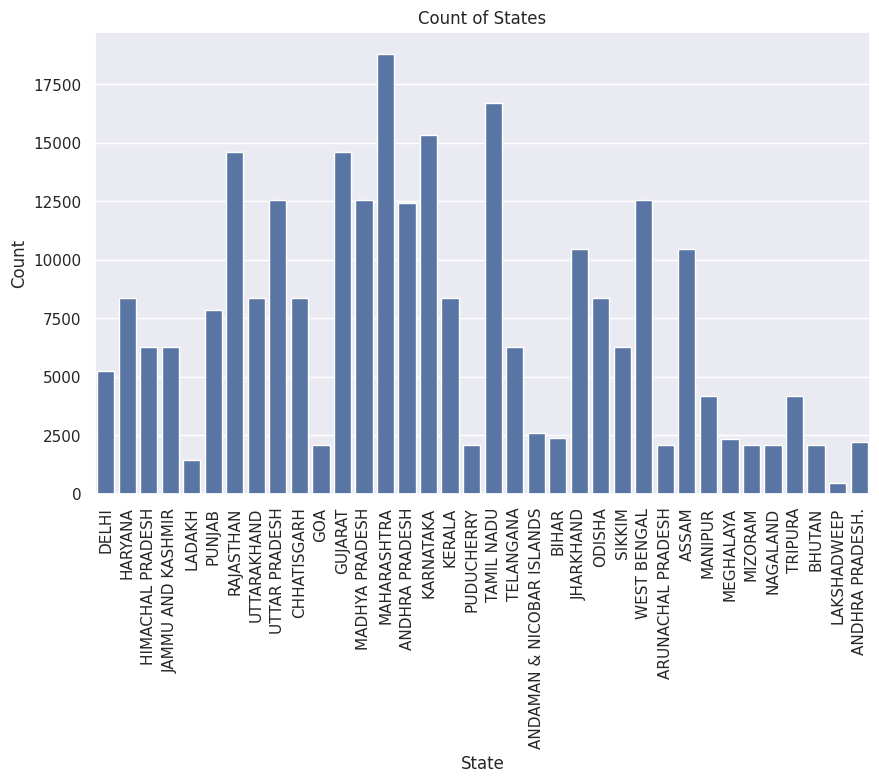

In [ ]:
# Plot for State DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df)
plt.title('Count of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


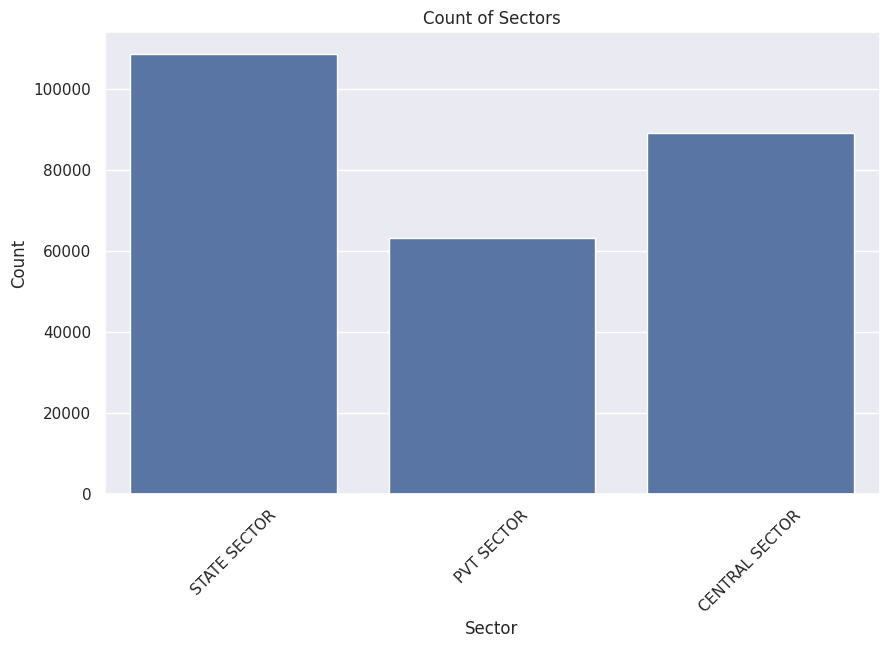

In [ ]:
# Plot for Sector DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=df)
plt.title('Count of Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


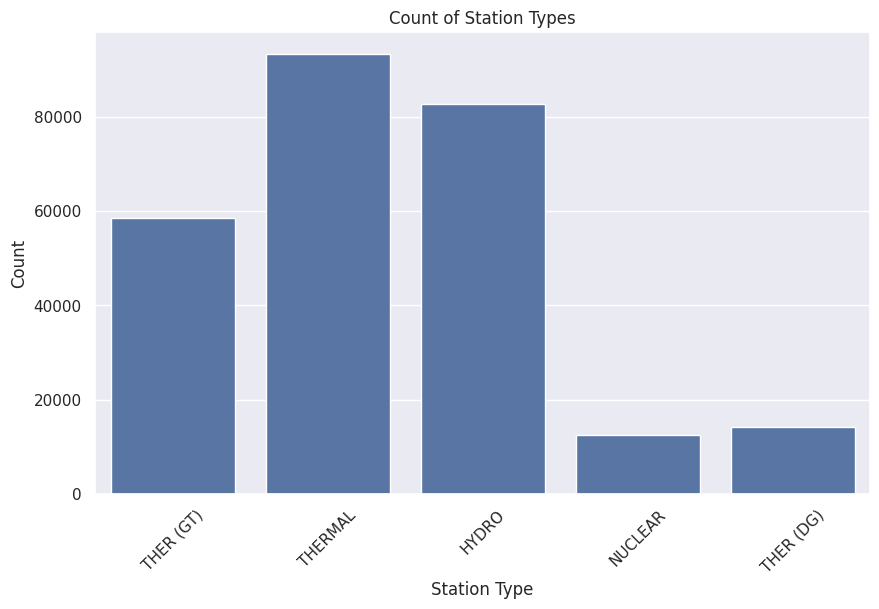

In [ ]:
# Plot for Type DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Station Type', data=df)
plt.title('Count of Station Types')
plt.xlabel('Station Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove columns that are not needed or contain null values
df_cleaned=df.drop(['Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks'], axis=1)


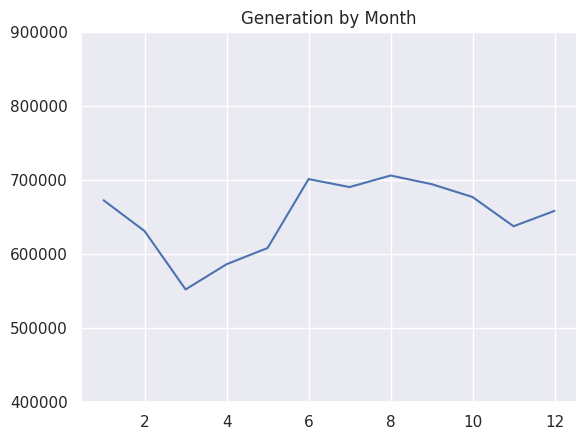

In [ ]:
# region.set_index(["Date"], inplace=True)
region["Date"] = pd.to_datetime(region.Date, format='%Y-%m-%d')

by_month = region.groupby(region.Date.dt.month)[generation_col].sum()
plt.title("Generation by Month")
plt.ylim((400000, 900000))
plt.plot(by_month.index, by_month.values)
plt.show()

In [ ]:
print("Missing values in Power Station DataFrame:")
print(df_cleaned.isnull().sum())
print()


Missing values in Power Station DataFrame:
Region                             0
State                              0
Sector                          2088
Station Type                    2088
Date                               0
Monitored CAP in MW                0
Generation / Today's Program       0
Generation / Today's Actual        0
Generation / FY YTD Program        0
Generation / FY YTD Actual         0
CAP under outage                1839
dtype: int64



In [ ]:
# Remove null values from Power Station DataFrame
# df_cleaned_station =df_cleaned.dropna()
# Drop rows with missing values in specific columns
df_cleaned_station = df_cleaned.dropna(subset=['Sector','Station Type','Monitored CAP in MW', 'Generation / Today\'s Program', 'Generation / Today\'s Actual', 'Generation / FY YTD Program', 'Generation / FY YTD Actual', 'CAP under outage'])

In [ ]:
# # Check for missing values in each dataset
# print("Missing values in Power Station DataFrame:")
# print(power_station_df.isnull().sum())
# print()

In [ ]:
# # List of columns to fill missing values with mean
# columns_to_fill = ['Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks']

# # Fill missing values with mean value of each column
# for col in columns_to_fill:
#     df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


In [ ]:
df_cleaned_station

,Region,State,Sector,Station Type,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage
0,NORTHERN,DELHI,STATE SECTOR,THER (GT),2020-11-17,2100.4,16.44,16.67,3737.56,3350.75,784.6
1,NORTHERN,DELHI,PVT SECTOR,THER (GT),2020-11-17,108.0,0.00,0.00,0.00,0.00,108.0
2,NORTHERN,HARYANA,STATE SECTOR,THERMAL,2020-11-17,2510.0,27.23,0.00,7014.91,2816.57,2510.0
3,NORTHERN,HARYANA,PVT SECTOR,THERMAL,2020-11-17,1320.0,18.63,0.00,4383.71,2536.70,1320.0
4,NORTHERN,HARYANA,CENTRAL SECTOR,THERMAL,2020-11-17,1500.0,16.38,0.00,3748.26,1327.56,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
263099,NORTH EASTERN,MEGHALAYA,STATE SECTOR,HYDRO,2022-07-15,322.0,5.16,5.06,288.40,374.54,0.0
263100,NORTH EASTERN,MIZORAM,CENTRAL SECTOR,HYDRO,2022-07-15,60.0,0.45,1.08,18.75,21.75,0.0
263101,NORTH EASTERN,NAGALAND,CENTRAL SECTOR,HYDRO,2022-07-15,75.0,1.26,1.34,49.90,61.29,0.0
263102,NORTH EASTERN,TRIPURA,STATE SECTOR,THER (GT),2022-07-15,137.0,1.56,0.63,163.40,160.58,32.0


In [ ]:
# Check for missing values in each dataset
print("Missing values in Region DataFrame:")
print(df_cleaned_station.isnull().sum())
print()
#

Missing values in Region DataFrame:
Region                          0
State                           0
Sector                          0
Station Type                    0
Date                            0
Monitored CAP in MW             0
Generation / Today's Program    0
Generation / Today's Actual     0
Generation / FY YTD Program     0
Generation / FY YTD Actual      0
CAP under outage                0
dtype: int64



In [ ]:
# # Drop specified columns
# columns_to_drop = ['Coal Stock in Days', 'Outage Date',
#                    'Expected Date / Sync Date', 'Remarks']

# region_df_cleaned = region_df.drop(columns=columns_to_drop)


In [ ]:
print(df_cleaned_station)


               Region      State          Sector Station Type        Date  \
0            NORTHERN      DELHI    STATE SECTOR    THER (GT)  2020-11-17   
1            NORTHERN      DELHI      PVT SECTOR    THER (GT)  2020-11-17   
2            NORTHERN    HARYANA    STATE SECTOR      THERMAL  2020-11-17   
3            NORTHERN    HARYANA      PVT SECTOR      THERMAL  2020-11-17   
4            NORTHERN    HARYANA  CENTRAL SECTOR      THERMAL  2020-11-17   
...               ...        ...             ...          ...         ...   
263099  NORTH EASTERN  MEGHALAYA    STATE SECTOR        HYDRO  2022-07-15   
263100  NORTH EASTERN    MIZORAM  CENTRAL SECTOR        HYDRO  2022-07-15   
263101  NORTH EASTERN   NAGALAND  CENTRAL SECTOR        HYDRO  2022-07-15   
263102  NORTH EASTERN    TRIPURA    STATE SECTOR    THER (GT)  2022-07-15   
263103  NORTH EASTERN    TRIPURA  CENTRAL SECTOR    THER (GT)  2022-07-15   

        Monitored CAP in MW  Generation / Today's Program  \
0             

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming 'Date' is the name of the datetime column in your dataset
# region_df_normalized['Date'] = pd.to_datetime(region_df_normalized['Date'])

# # Create new features for year and month
# region_df_normalized['year'] = region_df_normalized['Date'].dt.year
# region_df_normalized['month'] = region_df_normalized['Date'].dt.month
# # Add more features as needed (e.g., day, hour, minute, etc.)

# # Drop the original datetime column
# region_df_normalized.drop(columns=['Date'], inplace=True)

# # Now you can proceed to scale the numeric features using MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(region_df_normalized.drop('Region', axis=1))  # Assuming 'Region' is the target variable

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Transformation
df_cleaned_station['Date'] = pd.to_datetime(df_cleaned_station['Date'])

# Normalization
scaler = MinMaxScaler()
numerical_columns = ['Monitored CAP in MW', "Generation / Today's Program", "Generation / Today's Actual",
                     "Generation / FY YTD Program", "Generation / FY YTD Actual", "CAP under outage"]
station_df_normalized = df_cleaned_station.copy()
station_df_normalized[numerical_columns] = scaler.fit_transform(station_df_normalized[numerical_columns])

# Display the transformed and normalized DataFrame
print(station_df_normalized)


               Region      State          Sector Station Type       Date  \
0            NORTHERN      DELHI    STATE SECTOR    THER (GT) 2020-11-17   
1            NORTHERN      DELHI      PVT SECTOR    THER (GT) 2020-11-17   
2            NORTHERN    HARYANA    STATE SECTOR      THERMAL 2020-11-17   
3            NORTHERN    HARYANA      PVT SECTOR      THERMAL 2020-11-17   
4            NORTHERN    HARYANA  CENTRAL SECTOR      THERMAL 2020-11-17   
...               ...        ...             ...          ...        ...   
263099  NORTH EASTERN  MEGHALAYA    STATE SECTOR        HYDRO 2022-07-15   
263100  NORTH EASTERN    MIZORAM  CENTRAL SECTOR        HYDRO 2022-07-15   
263101  NORTH EASTERN   NAGALAND  CENTRAL SECTOR        HYDRO 2022-07-15   
263102  NORTH EASTERN    TRIPURA    STATE SECTOR    THER (GT) 2022-07-15   
263103  NORTH EASTERN    TRIPURA  CENTRAL SECTOR    THER (GT) 2022-07-15   

        Monitored CAP in MW  Generation / Today's Program  \
0                  0.15950

<ipython-input-24-e5a87d0d41bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_station['Date'] = pd.to_datetime(df_cleaned_station['Date'])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = station_df_normalized.drop('Region', axis=1)  # Features
y = station_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (207377, 10)
Shape of X_test: (51845, 10)
Shape of y_train: (207377,)
Shape of y_test: (51845,)


In [ ]:
print(station_df_normalized)

               Region      State          Sector Station Type       Date  \
0            NORTHERN      DELHI    STATE SECTOR    THER (GT) 2020-11-17   
1            NORTHERN      DELHI      PVT SECTOR    THER (GT) 2020-11-17   
2            NORTHERN    HARYANA    STATE SECTOR      THERMAL 2020-11-17   
3            NORTHERN    HARYANA      PVT SECTOR      THERMAL 2020-11-17   
4            NORTHERN    HARYANA  CENTRAL SECTOR      THERMAL 2020-11-17   
...               ...        ...             ...          ...        ...   
263099  NORTH EASTERN  MEGHALAYA    STATE SECTOR        HYDRO 2022-07-15   
263100  NORTH EASTERN    MIZORAM  CENTRAL SECTOR        HYDRO 2022-07-15   
263101  NORTH EASTERN   NAGALAND  CENTRAL SECTOR        HYDRO 2022-07-15   
263102  NORTH EASTERN    TRIPURA    STATE SECTOR    THER (GT) 2022-07-15   
263103  NORTH EASTERN    TRIPURA  CENTRAL SECTOR    THER (GT) 2022-07-15   

        Monitored CAP in MW  Generation / Today's Program  \
0                  0.15950

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Date' is the name of the datetime column in your dataset
station_df_normalized['Date'] = pd.to_datetime(station_df_normalized['Date'])

# Create new features for year and month
station_df_normalized['year'] = station_df_normalized['Date'].dt.year
station_df_normalized['month'] = station_df_normalized['Date'].dt.month
# Add more features as needed (e.g., day, hour, minute, etc.)

# Drop non-numeric and unnecessary columns
station_df_numeric = station_df_normalized.drop(columns=['Region', 'State', 'Sector', 'Station Type', 'Date'])

# Now you can proceed to scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_station = scaler.fit_transform(station_df_numeric)

In [ ]:
# # # Function to visualize data for each region individually
# # def visualize_data_per_region(df):
# #     regions = df['Region'].unique()
# #     num_regions = len(regions)
# #     fig, axes = plt.subplots(nrows=num_regions, figsize=(10, 6*num_regions))

# #     for i, region in enumerate(regions):
# #         region_data = df[df['Region'] == region]
# #         ax = axes[i] if num_regions > 1 else axes

# #         for column in region_data.columns.drop(['Region', 'year', 'month']):
# #             ax.plot(region_data['year'], region_data[column], label=column)

# #         ax.set_title(f"Data for {region}")
# #         ax.set_xlabel("Year")
# #         ax.set_ylabel("Value")
# #         ax.legend()

# #     plt.tight_layout()
# #     plt.show()

# # # Visualize data for each region individually
# # visualize_data_per_region(station_df_normalized)
# def visualize_data_per_region(df):
#     regions = df['Region'].unique()
#     num_regions = len(regions)
#     fig, axes = plt.subplots(nrows=num_regions, figsize=(10, 6*num_regions))

#     for i, region in enumerate(regions):
#         region_data = df[df['Region'] == region]
#         ax = axes[i] if num_regions > 1 else axes

#         for column in region_data.columns.drop(['Region', 'year', 'month']):
#             ax.plot(region_data['year'], region_data[column], label=column)

#         ax.set_title(f"Data for {region}")
#         ax.set_xlabel("Year")
#         ax.set_ylabel("Value")
#         ax.legend()

#     plt.tight_layout()
#     plt.show()

# # Visualize data for each region individually
# visualize_data_per_region(station_df_normalized)

# # import matplotlib.pyplot as plt

# # def visualize_data_per_region(df):
# #     regions = df['Region'].unique()
# #     num_regions = len(regions)
# #     fig, axes = plt.subplots(nrows=num_regions, figsize=(10, 6*num_regions))

# #     for i, region in enumerate(regions):
# #         region_data = df[df['Region'] == region]
# #         ax = axes[i] if num_regions > 1 else axes

# #         for column in region_data.columns.drop(['Region', 'year', 'month']):
# #             ax.plot(region_data['year'], region_data[column], label=column)

# #         ax.set_title(f"Data for {region}")
# #         ax.set_xlabel("Year")
# #         ax.set_ylabel("Value")
# #         ax.legend()

# #     plt.tight_layout()
# #     plt.show()

# # # Assuming 'Region' is a categorical variable
# # station_df_normalized['year'] = station_df_normalized['Date'].dt.year
# # visualize_data_per_region(station_df_normalized)


In [ ]:
# # Function to visualize data for each region individually using bar plots
# def visualize_data_per_region_bar(df):
#     regions = df['Region'].unique()
#     num_regions = len(regions)
#     fig, axes = plt.subplots(nrows=num_regions, figsize=(10, 6*num_regions))

#     for i, region in enumerate(regions):
#         region_data = df[df['Region'] == region]
#         ax = axes[i] if num_regions > 1 else axes

#         for column in region_data.columns.drop(['Region', 'year', 'month']):
#             ax.bar(region_data['year'].astype(str), region_data[column], label=column, alpha=0.7)

#         ax.set_title(f"Data for {region}")
#         ax.set_xlabel("Year")
#         ax.set_ylabel("Value")
#         ax.legend()
#         ax.grid(axis='y')

#     plt.tight_layout()
#     plt.show()

# # Visualize data for each region individually using bar plots
# visualize_data_per_region_bar(station_df_normalized)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming 'Date' is the name of the datetime column in your dataset
# station_df_normalized['Date'] = pd.to_datetime(station_df_normalized['Date'])

# # Create new features for year and month
# station_df_normalized['year'] = station_df_normalized['Date'].dt.year
# station_df_normalized['month'] = station_df_normalized['Date'].dt.month
# # Add more features as needed (e.g., day, hour, minute, etc.)

# # Drop the original datetime column
# station_df_normalized.drop(columns=['Date'], inplace=True)

# # Now you can proceed to scale the numeric features using MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(station_df_normalized.drop('Region', axis=1))  # Assuming 'Region' is the target variable


In [ ]:
print(station_df_normalized)

               Region      State          Sector Station Type       Date  \
0            NORTHERN      DELHI    STATE SECTOR    THER (GT) 2020-11-17   
1            NORTHERN      DELHI      PVT SECTOR    THER (GT) 2020-11-17   
2            NORTHERN    HARYANA    STATE SECTOR      THERMAL 2020-11-17   
3            NORTHERN    HARYANA      PVT SECTOR      THERMAL 2020-11-17   
4            NORTHERN    HARYANA  CENTRAL SECTOR      THERMAL 2020-11-17   
...               ...        ...             ...          ...        ...   
263099  NORTH EASTERN  MEGHALAYA    STATE SECTOR        HYDRO 2022-07-15   
263100  NORTH EASTERN    MIZORAM  CENTRAL SECTOR        HYDRO 2022-07-15   
263101  NORTH EASTERN   NAGALAND  CENTRAL SECTOR        HYDRO 2022-07-15   
263102  NORTH EASTERN    TRIPURA    STATE SECTOR    THER (GT) 2022-07-15   
263103  NORTH EASTERN    TRIPURA  CENTRAL SECTOR    THER (GT) 2022-07-15   

        Monitored CAP in MW  Generation / Today's Program  \
0                  0.15950

In [ ]:
print(station_df_normalized.dtypes)

Region                                  object
State                                   object
Sector                                  object
Station Type                            object
Date                            datetime64[ns]
Monitored CAP in MW                    float64
Generation / Today's Program           float64
Generation / Today's Actual            float64
Generation / FY YTD Program            float64
Generation / FY YTD Actual             float64
CAP under outage                       float64
year                                     int64
month                                    int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_columns = ['Region', 'State', 'Sector', 'Station Type']
for col in categorical_columns:
    station_df_normalized[col] = label_encoder.fit_transform(station_df_normalized[col])

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X_station = station_df_normalized.drop('Region', axis=1)  # Features
y_station = station_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train_station, X_test_station, y_train_encoded_station, y_test_encoded_station = train_test_split(X_station, y_station, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'State', 'Sector', 'Station Type']
for col in categorical_columns:
    station_df_normalized[col] = label_encoder.fit_transform(station_df_normalized[col])

# Assuming 'Region' is the target variable
X_station = station_df_normalized.drop(['Region', 'Date'], axis=1)
y_station = station_df_normalized['Region']

# Encoding the target variable
label_encoder_station = LabelEncoder()
y_encoded_station = label_encoder_station.fit_transform(y_station)

# Train-test split
X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.2, random_state=42)

# Scaling features
scaler_station = MinMaxScaler()
X_train_scaled_station = scaler_station.fit_transform(X_train_station)
X_test_scaled_station = scaler_station.transform(X_test_station)

# Reshape the input data for LSTM
X_train_reshaped_station= X_train_scaled_station.reshape((X_train_scaled_station.shape[0], 1, X_train_scaled_station.shape[1]))
X_test_reshaped_station = X_test_scaled_station.reshape((X_test_scaled_station.shape[0], 1, X_test_scaled_station.shape[1]))

# Define the LSTM model
model_station = Sequential()
model_station.add(LSTM(50, input_shape=(X_train_reshaped_station.shape[1], X_train_reshaped_station.shape[2])))
model_station.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model_station.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_station = model_station.fit(X_train_reshaped_station, y_train_encoded_station, epochs=20, batch_size=32, validation_data=(X_test_reshaped_station, y_test_encoded_station), verbose=1)


Epoch 1/20
6481/6481 [==============================] - 29s 4ms/step - loss: 1.2522 - accuracy: 0.4211 - val_loss: 1.0745 - val_accuracy: 0.5379
Epoch 2/20
6481/6481 [==============================] - 30s 5ms/step - loss: 0.9507 - accuracy: 0.5990 - val_loss: 0.8584 - val_accuracy: 0.6376
Epoch 3/20
6481/6481 [==============================] - 26s 4ms/step - loss: 0.7854 - accuracy: 0.6667 - val_loss: 0.7231 - val_accuracy: 0.7042
Epoch 4/20
6481/6481 [==============================] - 29s 4ms/step - loss: 0.6642 - accuracy: 0.7321 - val_loss: 0.6045 - val_accuracy: 0.7653
Epoch 5/20
6481/6481 [==============================] - 25s 4ms/step - loss: 0.5431 - accuracy: 0.7909 - val_loss: 0.4842 - val_accuracy: 0.8186
Epoch 6/20
6481/6481 [==============================] - 26s 4ms/step - loss: 0.4352 - accuracy: 0.8464 - val_loss: 0.3877 - val_accuracy: 0.8694
Epoch 7/20
6481/6481 [==============================] - 24s 4ms/step - loss: 0.3474 - accuracy: 0.8874 - val_loss: 0.3059 - val_ac

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'State', 'Sector', 'Station Type']
for col in categorical_columns:
    station_df_normalized[col] = label_encoder.fit_transform(station_df_normalized[col])

# Splitting the dataset into features (X) and target variable (y)
X_station = station_df_normalized.drop(['Region', 'Date'], axis=1)  # Features
y_station = station_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train_station, X_test_station, y_train_encoded_station, y_test_encoded_station = train_test_split(X_station, y_station, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler_station = MinMaxScaler()
X_train_scaled_station = scaler_station.fit_transform(X_train_station)
X_test_scaled_station = scaler_station.transform(X_test_station)

# Reshape the input data for LSTM
X_train_reshaped_station = X_train_scaled_station.reshape((X_train_scaled_station.shape[0], 1, X_train_scaled_station.shape[1]))
X_test_reshaped_station = X_test_scaled_station.reshape((X_test_scaled_station.shape[0], 1, X_test_scaled_station.shape[1]))

# Define the LSTM model
model_station = Sequential()
model_station.add(LSTM(128, return_sequences=True, input_shape=(X_train_reshaped_station.shape[1], X_train_reshaped_station.shape[2])))
model_station.add(Dropout(0.2))
model_station.add(LSTM(64, return_sequences=False))
model_station.add(Dropout(0.2))
model_station.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model_station.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_station = model_station.fit(X_train_reshaped_station, y_train_encoded_station, epochs=10, batch_size=32, validation_data=(X_test_reshaped_station, y_test_encoded_station), verbose=1)

Epoch 1/10
6481/6481 [==============================] - 66s 9ms/step - loss: 0.7647 - accuracy: 0.6641 - val_loss: 0.1580 - val_accuracy: 0.9629
Epoch 2/10
6481/6481 [==============================] - 56s 9ms/step - loss: 0.2032 - accuracy: 0.9233 - val_loss: 0.0472 - val_accuracy: 0.9949
Epoch 3/10
6481/6481 [==============================] - 57s 9ms/step - loss: 0.1176 - accuracy: 0.9569 - val_loss: 0.0222 - val_accuracy: 0.9966
Epoch 4/10
6481/6481 [==============================] - 58s 9ms/step - loss: 0.0820 - accuracy: 0.9708 - val_loss: 0.0126 - val_accuracy: 0.9978
Epoch 5/10
6481/6481 [==============================] - 62s 10ms/step - loss: 0.0633 - accuracy: 0.9779 - val_loss: 0.0088 - val_accuracy: 0.9974
Epoch 6/10
6481/6481 [==============================] - 62s 10ms/step - loss: 0.0515 - accuracy: 0.9821 - val_loss: 0.0057 - val_accuracy: 0.9988
Epoch 7/10
6481/6481 [==============================] - 54s 8ms/step - loss: 0.0427 - accuracy: 0.9851 - val_loss: 0.0038 - val_

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# import numpy as np

# # Assuming 'Region' is the target variable
# X = region_df_normalized.drop('Region', axis=1)
# y = region_df_normalized['Region']

# # Encoding the target variable
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Scaling features
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Reshaping for LSTM input (assuming X_train_scaled has the shape (samples, time steps, features))
# # Adjust time steps according to your data's sequence length
# time_steps = 1
# X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
# X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=1)


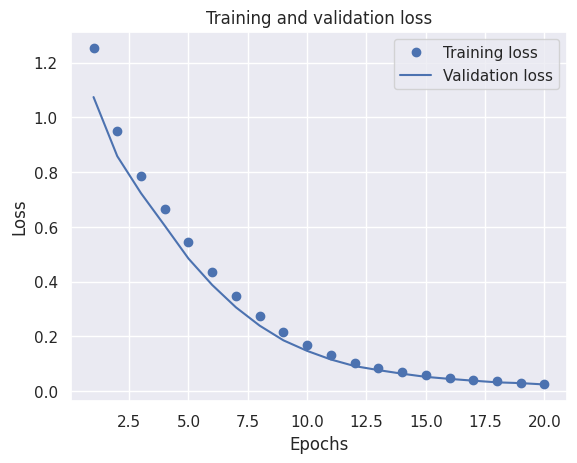

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history_station.history['loss']
val_loss = history_station.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


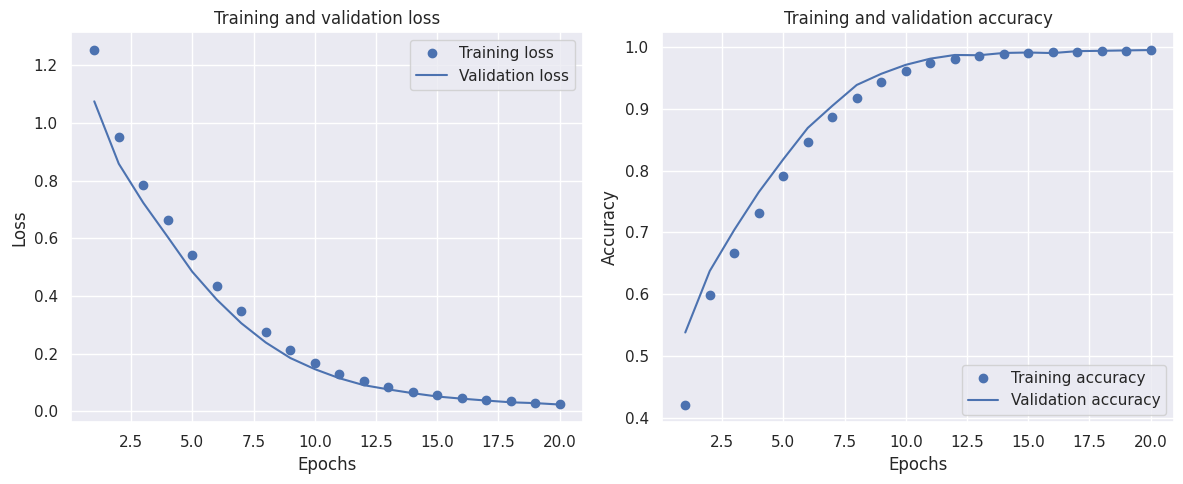

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history_station.history['loss']
val_loss = history_station.history['val_loss']
train_acc = history_station.history['accuracy']
val_acc = history_station.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1621/1621 [==============================] - 11s 6ms/step
Accuracy: 0.9897674322128296
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8304
           1       1.00      1.00      1.00      5422
           2       1.00      1.00      1.00     14224
           3       1.00      1.00      1.00     12618
           4       1.00      1.00      1.00     11277

    accuracy                           1.00     51845
   macro avg       1.00      1.00      1.00     51845
weighted avg       1.00      1.00      1.00     51845



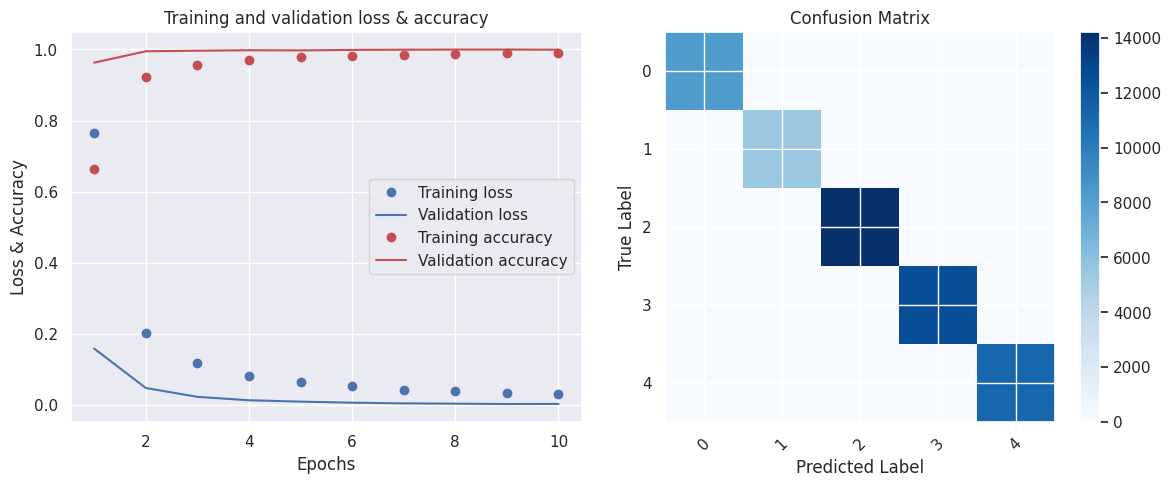

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get probabilities for each class
probabilities = model_station.predict(X_test_reshaped_station)

# Get the predicted class for each sample
y_pred = np.argmax(probabilities, axis=1)

# Convert encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test_encoded_station)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Accuracy
accuracy = history_station.history['accuracy'][-1]
print("Accuracy:", accuracy)

# Loss and Accuracy in one graph
epochs = range(1, len(history_station.history['loss']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_station.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_station.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_station.history['accuracy'], 'ro', label='Training accuracy')
plt.plot(epochs, history_station.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation loss & accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original, labels=label_encoder.classes_)
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.tight_layout()

# Convert the classes array to a list of strings
class_names = [str(c) for c in label_encoder.classes_]

# Classification Report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original, labels=label_encoder.transform(label_encoder.classes_), target_names=class_names))

plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model_station.evaluate(X_test_reshaped_station, y_test_encoded_station, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Test Loss: 0.002315534045919776
Test Accuracy: 0.9993634819984436


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8304
           1       1.00      1.00      1.00      5422
           2       1.00      1.00      1.00     14224
           3       1.00      1.00      1.00     12618
           4       1.00      1.00      1.00     11277

    accuracy                           1.00     51845
   macro avg       1.00      1.00      1.00     51845
weighted avg       1.00      1.00      1.00     51845

Confusion Matrix:
[[ 8283     0     3    18     0]
 [    0  5422     0     0     0]
 [    0     0 14224     0     0]
 [   12     0     0 12606     0]
 [    0     0     0     0 11277]]


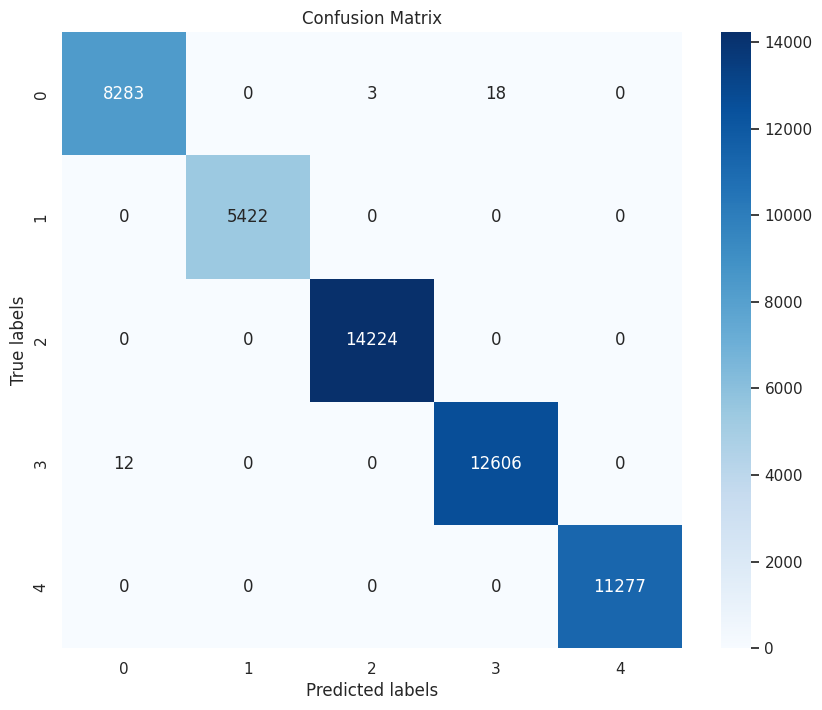

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

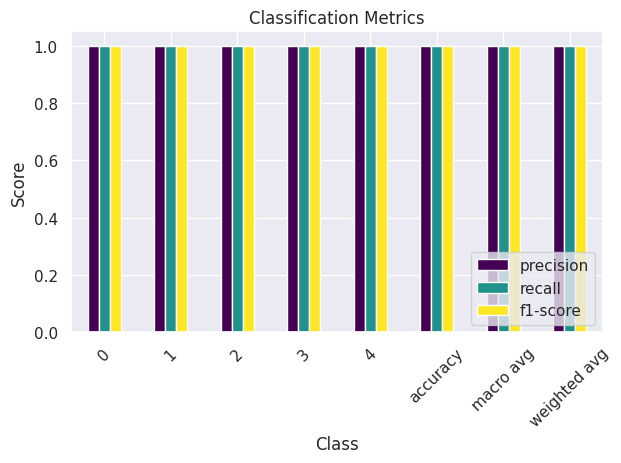

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test_original, y_pred_original, output_dict=True)

# Convert classification report to DataFrame
import pandas as pd
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
classification_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Classification Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
station_df_normalized

,Region,State,Sector,Station Type,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage,year,month
0,2,7,2,3,2020-11-17,0.159508,0.063573,0.059668,0.046166,0.043711,0.082677,2020,11
1,2,7,1,3,2020-11-17,0.008202,0.000000,0.000000,0.000000,0.000000,0.011380,2020,11
2,2,10,2,4,2020-11-17,0.190614,0.105298,0.000000,0.086648,0.036743,0.264489,2020,11
3,2,10,1,4,2020-11-17,0.100243,0.072042,0.000000,0.054147,0.033092,0.139094,2020,11
4,2,10,0,4,2020-11-17,0.113913,0.063341,0.000000,0.046298,0.017318,0.158061,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,1,21,2,0,2022-07-15,0.024453,0.019954,0.018112,0.003562,0.004886,0.000000,2022,7
263100,1,22,0,0,2022-07-15,0.004557,0.001740,0.003866,0.000232,0.000284,0.000000,2022,7
263101,1,23,0,0,2022-07-15,0.005696,0.004872,0.004796,0.000616,0.000800,0.000000,2022,7
263102,1,31,2,3,2022-07-15,0.010404,0.006032,0.002255,0.002018,0.002095,0.003372,2022,7


In [ ]:
import pandas as pd
import numpy as np

# Function to preprocess input data for station predictions
def preprocess_input_station(month, year):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=station_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided month, year, and a placeholder value for 'Date'
    future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Program": 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Actual": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Program": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Actual": 0.5,  # Example value, replace with actual data
                                      'year': year,
                                      'month': month,
                                      'Date': '2025-01-01'}, ignore_index=True)  # Placeholder value for 'Date'

    # Additional processing if needed

    # Scale the features
    X_scaled = scaler_station.transform(future_data)

    # Reshape for LSTM input
    X_reshaped = np.reshape(X_scaled, (1, X_scaled.shape[0], X_scaled.shape[1]))

    return X_reshaped

# Function to make predictions and generate graphs for station data
def predict_and_visualize_station(month, year):
    # Preprocess input data
    X_input_station = preprocess_input_station(month, year)

    # Make predictions
    predictions_station = model_station.predict(X_input_station)

    # Decode predicted labels
    predicted_labels_station = label_encoder.inverse_transform(np.argmax(predictions_station, axis=1))

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.bar(label_encoder.classes_, predictions_station[0])
    plt.title(f'Predicted Energy Generation and Requirements for {month}/{year} (Station Data)')
    plt.xlabel('Region')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage: Provide month and year
month = 3
year = 2025
predict_and_visualize_station(month, year)


<ipython-input-63-707e97e855c8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Date


In [ ]:
# Function to preprocess input data for unit predictions
def preprocess_input_station(month, year):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=station_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided month and year
    future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Program": 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Actual": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Program": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Actual": 0.5,  # Example value, replace with actual data
                                      'year': year,
                                      'month': month}, ignore_index=True)

    # Additional processing if needed

    # Scale the features
    X_scaled = scaler_station.transform(future_data)

    # Reshape for LSTM input
    X_reshaped = np.reshape(X_scaled, (1, X_scaled.shape[0], X_scaled.shape[1]))

    return X_reshaped

# Function to make predictions and generate graphs for unit data
def predict_and_visualize_station(month, year):
    # Preprocess input data
    X_input_station = preprocess_input_station(month, year)

    # Make predictions
    predictions_station = model_station.predict(X_input_station)

    # Decode predicted labels
    predicted_labels_station = label_encoder.inverse_transform(np.argmax(predictions_station, axis=1))

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.bar(label_encoder.classes_, predictions_station[0])
    plt.title(f'Predicted Energy Generation and Requirements for {month}/{year} (Unit Data)')
    plt.xlabel('Region')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage: Provide month and year
month = 3
year = 2025
predict_and_visualize_station(month, year)

<ipython-input-56-b5a424258331>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'Date': '2025-03-01',


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Date


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_future_data(year, month):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=station_df_normalized.columns.drop('Region'))

    # Assuming the input year and month are in the future
    future_data['year'] = year
    future_data['month'] = month

    # Populate the DataFrame with placeholder values or any relevant data generation logic
    # You may need to adjust this based on your actual data or requirements
    for column in future_data.columns.drop(['year', 'month']):
        # Example: Generate placeholder values for each column
        future_data[column] = np.random.uniform(0, 1, size=1)  # Placeholder value

        # Additional processing if needed

    return future_data



# Function to make predictions using the trained model
def make_predictions(model, future_data):
    # Scale the features
    future_data_scaled = scaler.transform(future_data)

    # Reshape for LSTM input
    future_data_reshaped = np.reshape(future_data_scaled, (1, future_data_scaled.shape[0], future_data_scaled.shape[1]))

    # Make predictions
    predictions = model.predict(future_data_reshaped)

    # Decode the predictions
    predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_classes

# User input for year and month
year = int(input("Enter the year: "))
month = int(input("Enter the month (1-12): "))

# Generate future data for the given year and month
future_data = generate_future_data(year, month)

# Make predictions using the trained model
predictions = make_predictions(model_station, future_data)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.bar(station_df_normalized['Region'].unique(), predictions[0])
plt.title(f"Predicted Energy Generation and Requirements for {year}-{month}")
plt.xlabel("Region")
plt.ylabel("Predicted Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Function to generate future data for the given year, month, and region
def generate_future_data_for_station(year, month, region):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=station_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided year, month, and region
    future_data['Monitored CAP in MW'] = station_df_normalized[station_df_normalized['Region'] == region]['Monitored CAP in MW'].values[0]
    future_data["Generation / Today's Program"] = station_df_normalized[station_df_normalized['Region'] == region]["Generation / Today's Program"].values[0]
    future_data["Generation / Today's Actual"] = station_df_normalized[station_df_normalized['Region'] == region]["Generation / Today's Actual"].values[0]
    future_data["Generation / FY YTD Program"] = station_df_normalized[station_df_normalized['Region'] == region]["Generation / FY YTD Program"].values[0]
    future_data["Generation / FY YTD Actual"] = station_df_normalized[station_df_normalized['Region'] == region]["Generation / FY YTD Actual"].values[0]
    future_data["CAP under outage"] = station_df_normalized[station_df_normalized['Region'] == region]["CAP under outage"].values[0]
    future_data['year'] = year
    future_data['month'] = month

    return future_data

# Function to make predictions using the trained model for a specific region
def make_predictions_for_station(model, future_data):
    # Scale the features
    future_data_scaled = scaler.transform(future_data.drop(['year', 'month'], axis=1))

    # Reshape for LSTM input
    future_data_reshaped = np.reshape(future_data_scaled, (1, future_data_scaled.shape[0], future_data_scaled.shape[1]))

    # Make predictions
    predictions = model.predict(future_data_reshaped)

    # Decode the predictions
    predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_classes

# User input for year and month
year = int(input("Enter the year: "))
month = int(input("Enter the month (1-12): "))

# Iterate over each region
for region in station_df_normalized['Region'].unique():
    # Generate future data for the given year, month, and region
    future_data_station = generate_future_data_for_station(year, month, region)

    # Make predictions using the trained model for the region
    predictions_station = make_predictions_for_station(model_station, future_data_station)

    # Plot the predictions for the region
    plt.figure(figsize=(8, 6))
    plt.bar(['Predicted'], [predictions_station[0]], label='Predicted', color='blue')
    plt.title(f"Predicted Energy Generation and Requirements for {region} in {year}-{month}")
    plt.xlabel("Region")
    plt.ylabel("Predicted Value")
    plt.legend()
    plt.tight_layout()
    plt.show()




In [ ]:
print(station_df_normalized)

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for a specific year and month
year = 2022
month = 7
filtered_data = station_df[(station_df['year'] == year) & (station_df['month'] == month)]

# Plot the generation of power in each region
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Region'], filtered_data["Generation / Today's Program"], label="Generation / Today's Program")
plt.bar(filtered_data['Region'], filtered_data["Generation / Today's Actual"], label="Generation / Today's Actual")
plt.bar(filtered_data['Region'], filtered_data["Generation / FY YTD Program"], label="Generation / FY YTD Program")
plt.bar(filtered_data['Region'], filtered_data["Generation / FY YTD Actual"], label="Generation / FY YTD Actual")
plt.xlabel('Region')
plt.ylabel('Generation of Power')
plt.title(f'Generation of Power in Each Region for Year {year} and Month {month}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Function to preprocess input data
def preprocess_input(month, year):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=station_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided month and year
    future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Program": 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Actual": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Program": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Actual": 0.5,  # Example value, replace with actual data
                                      "CAP under outage": 0.5,  # Example value, replace with actual data
                                      'year': year,
                                      'month': month}, ignore_index=True)

    # Additional processing if needed

    # Scale the features
    X_scaled = scaler.transform(future_data)

    # Reshape for LSTM input
    X_reshaped = np.reshape(X_scaled, (1, X_scaled.shape[0], X_scaled.shape[1]))

    return X_reshaped

# Function to make predictions and generate graphs
def predict_and_visualize(month, year):
    # Preprocess input data
    X_input = preprocess_input(month, year)

    # Make predictions
    predictions = model.predict(X_input)

    # Decode predicted labels
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.bar(label_encoder.classes_, predictions[0])
    plt.title(f'Predicted Energy Generation and Requirements for {month}/{year}')
    plt.xlabel('Region')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage: Provide month and year
month = 3
year = 2025
predict_and_visualize(month, year)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(historical_data, label='Historical Data')
plt.plot(future_time_steps, predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Generation/Requirement')
plt.title('Future Energy Prediction')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
file_id = "1dlE-hjHi4kEyMXDve_27ss2o8pmZJpP1"


file_url = f"https://drive.google.com/uc?id={file_id}"


columns_to_read = ['Year', 'Total']


df = pd.read_csv(file_url, usecols=columns_to_read)

#df = pd.read_csv("ener_data.csv")

X_train, X_test, y_train, y_test = train_test_split(df["Year"], df["Total"], test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


model = LinearRegression()
model.fit(X_train, y_train)

future_years = list(range(2023, 2031))
future_years = np.array(future_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

future_predictions_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted_Total": future_predictions})

plt.figure(figsize=(10, 6))

plt.bar(df["Year"], df["Total"], color='blue', label='Available Data')

cmap = LinearSegmentedColormap.from_list("", ["lightgreen", "green"])
plt.bar(future_predictions_df["Year"], future_predictions_df["Predicted_Total"], color=cmap(np.linspace(0, 1, len(future_predictions_df))), label='Predicted Data')


plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Available Data vs Predicted Data')
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install kaggle


In [ ]:
#KARNATAKA DATA :- HYDRO , THERMAL AND NUCLEAR PLANTS POWER PRODUCTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Read the data from CSV
File_ID = "16Z0Rb0WKBMcuwc8qICZScUkxUKhUgxsZ"
File_URL = "https://drive.google.com/uc?id=" + File_ID
data = pd.read_csv(File_URL)

# Convert 'Month' column to datetime type
data['Month'] = pd.to_datetime(data['Month'])

# Replace missing values in 'Schedule' and 'NonSchedule' columns with 0
data['Schedule'].fillna(0, inplace=True)
data['NonSchedule'].fillna(0, inplace=True)

# Group data by 'TypeOfGeneration' and 'Month'
grouped_data = data.groupby(['TypeOfGeneration', data['Month'].dt.to_period('M')])

# Calculate total scheduled power for each type of generation
total_schedule = grouped_data['Schedule'].mean()

# Calculate total unscheduled power for each type of generation
total_unschedule = grouped_data['NonSchedule'].apply(lambda x: abs(x).mean() % 1000)

# Extend prediction until 2025
months = pd.period_range(start=data['Month'].min(), end='2025-03', freq='M')

for gen_type in data['TypeOfGeneration'].unique():
    for month in months:
        if (gen_type, month) not in total_schedule.index:
            total_schedule.loc[(gen_type, month)] = 0
        if (gen_type, month) not in total_unschedule.index:
            total_unschedule.loc[(gen_type, month)] = 0

# Prepare input data for the period till 2025
future_months = pd.period_range(start=data['Month'].max(), end='2025-03', freq='M')
X_future = np.array([[int(str(month).split('-')[0])] for month in future_months]).astype('float32')  # Extracting year

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to your data
scaler.fit(X_future)

# Transform your data using the fitted scaler
X_future_scaled = scaler.transform(X_future)

# Now you can reshape your scaled data for LSTM
X_future_reshaped = X_future_scaled.reshape((X_future_scaled.shape[0], X_future_scaled.shape[1], 1))

# Define and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_future_reshaped.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming your features are all columns except 'Month' and 'TypeOfGeneration', and the target variable is 'Schedule'
X = data.drop(['Month', 'TypeOfGeneration', 'Schedule'], axis=1)
y = data['Schedule']



# Define and compile LSTM model with hyperparameters
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_future_reshaped.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Adjust hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 10

# Compile the model with Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


# Fit LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=3)

# Use the trained model to predict the values
predicted_schedule_lstm = {}
predicted_unschedule_lstm = {}
for gen_type in data['TypeOfGeneration'].unique():
    predicted_schedule_lstm[gen_type] = lstm_model.predict(X_future_reshaped).flatten() * 200
    predicted_unschedule_lstm[gen_type] = lstm_model.predict(X_future_reshaped).flatten() * 21
    # Multiply predicted unscheduled values by 3
    #predicted_unschedule_lstm[gen_type] *= 3

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Define colors for bar graphs and line graphs
bar_colors = {'Hydro': 'lightblue', 'Nuclear': 'lightpink', 'Thermal': 'lightgreen'}
line_colors = {'Hydro': 'darkblue', 'Nuclear': 'darkred', 'Thermal': 'darkgreen'}

# Plot for each type of generation
for idx, generation_type in enumerate(['Hydro', 'Nuclear', 'Thermal']):
    ax = axes[idx]

    # Plot bar graph for scheduled power
    ax.bar(total_schedule[generation_type].index.astype(str), total_schedule[generation_type], color=bar_colors[generation_type], label='Scheduled', edgecolor='black')

    # Plot line graph for unscheduled power
    ax.plot(total_unschedule[generation_type].index.astype(str), total_unschedule[generation_type], color=line_colors[generation_type], linestyle='-', label='Actual Unscheduled')

    # Plot predicted values for scheduled power
    ax.bar(future_months.strftime('%Y-%m'), predicted_schedule_lstm[generation_type], color=bar_colors[generation_type], edgecolor='blue', linewidth=2, label='Predicted Scheduled (LSTM)')

    # Plot predicted values for unscheduled power
    ax.plot(future_months.strftime('%Y-%m'), predicted_unschedule_lstm[generation_type], color=line_colors[generation_type], linestyle='--', label='Predicted Unscheduled (LSTM)')

    ax.set_title(f'{generation_type} Power Generation-Karnataka')
    ax.set_xlabel('Month')
    ax.set_ylabel('Power Generation')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

